In [106]:
field = 'BootesB'

inst = 1
catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
fname=catcoorddir+'PanSTARRS/'+ field + '.txt'
dfI = pd.read_csv(fname)

inst = 2
catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
fname=catcoorddir+'PanSTARRS/'+ field + '.txt'
dfH = pd.read_csv(fname)

In [107]:
def get_corr_mag(inst, my_arr, cls_arr, mlin_arr):
    sr = ((7./3600)*(np.pi/180))**2
    if inst==1:
        lambdaeff=1.05
        Ilin_arr=3631*10**(-mlin_arr/2.5)*(3/lambdaeff)*1e6/(sr*1e9)
        I_arr = 1.07 * Ilin_arr
        sp = np.where((my_arr < 23.3) & (cls_arr==1))[0]
        I_arr[sp] = (-0.44 * my_arr[sp] + 10.34) * Ilin_arr[sp]
        sp = np.where((my_arr >= 23.3) & (cls_arr==1))[0]
        I_arr[sp] = (-0.44 * 23.3 + 10.34) * Ilin_arr[sp]
    else:
        lambdaeff=1.79
        Ilin_arr=3631*10**(-mlin_arr/2.5)*(3/lambdaeff)*1e6/(sr*1e9)
        I_arr = 1.40 * Ilin_arr
        sp = np.where((my_arr < 23.3) & (cls_arr==1))[0]
        I_arr[sp] = (-0.47 * my_arr[sp] + 11.11) * Ilin_arr[sp]
        sp = np.where((my_arr >= 23.3) & (cls_arr==1))[0]
        I_arr[sp] = (-0.47 * 23.3 + 11.11) * Ilin_arr[sp]

    m_arr = mlin_arr - 2.5 * np.log10(I_arr/Ilin_arr)

    return m_arr

In [108]:
dfI['I'] = get_corr_mag(1, dfI['y'], dfI['dbscanClass'], dfI['I_lin'])
dfH['H'] = get_corr_mag(2, dfH['y'], dfH['dbscanClass'], dfH['H_lin'])
dfI.drop(dfI[(dfI.x < -0.5) | (dfI.x > 1023.5) | (dfI.y < -0.5) | (dfI.y > 1023.5)].index, inplace = True)
dfH.drop(dfH[(dfH.x < -0.5) | (dfH.x > 1023.5) | (dfH.y < -0.5) | (dfH.y > 1023.5)].index, inplace = True)

In [109]:
dfI.head()

,ra,dec,x,y,gMeanPSFMag,rMeanPSFMag,iMeanPSFMag,zMeanPSFMag,yMeanPSFMag,dbscanClass,I_lin,H_lin,I
333,216.210152,32.174061,0.075762,59.464881,-999.000000,-999.000000,19.945400,19.264601,18.929199,-999.0,18.877635,18.437529,18.804176
334,216.210855,32.173686,-0.123206,59.769291,19.991899,18.922800,17.796301,17.297899,17.081200,-999.0,17.095389,17.216501,17.021930
350,216.159613,32.172896,-0.150829,37.250982,-999.000000,21.229300,20.603600,20.233200,19.966999,-999.0,19.927433,19.589731,19.853974
353,216.088898,32.173510,0.712519,6.181290,21.561600,20.489000,19.752501,19.406099,19.261299,-999.0,19.310426,19.729730,19.236966
360,216.285078,32.174169,-0.402138,92.363856,18.748100,17.639601,17.118000,16.865999,16.726700,-1.0,16.753894,16.986004,16.680435


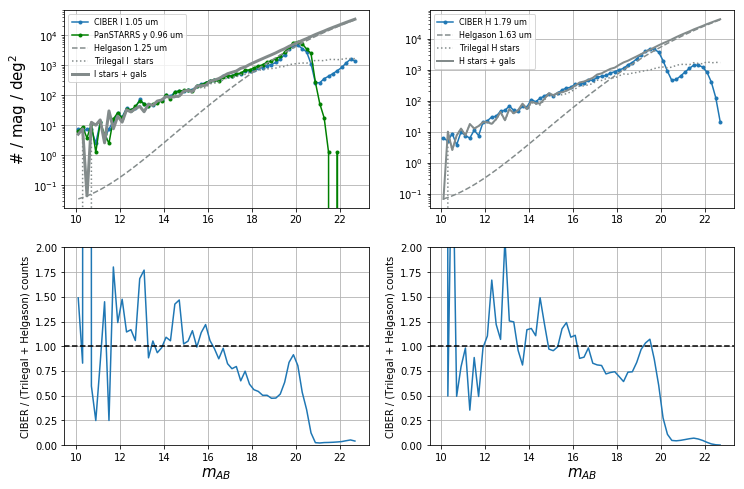

In [113]:
# mag function
fig, ax = plt.subplots(2,2,figsize=(12,8))

dm = 0.2
magedge_arr = np.arange(10,23,dm)
mag_arr = (magedge_arr[1:] + magedge_arr[:-1]) / 2
histI_arr = np.histogram(dfI['I'].values, magedge_arr)[0] / 4 / dm
ax[0][0].plot(mag_arr,histI_arr, '.-', label = 'CIBER I 1.05 um')
histH_arr = np.histogram(dfH['H'].values, magedge_arr)[0] / 4 / dm
ax[0][1].plot(mag_arr,histH_arr, '.-', label = 'CIBER H 1.79 um')

histy_arr = np.histogram(dfI['yMeanPSFMag'].values, magedge_arr)[0] / 4 / dm
ax[0][0].plot(mag_arr,histy_arr, 'g.-', label = 'PanSTARRS y 0.96 um')

helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
helgdat = np.loadtxt(helgdir + 'Helgason125.txt', skiprows=1, delimiter=',')
helgI = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mag_arr))
ax[0][0].plot(mag_arr, helgI, '--', c = '#838B8B', label = 'Helgason 1.25 um')
helgdat = np.loadtxt(helgdir + 'Helgason163.txt', skiprows=1, delimiter=',')
helgH = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mag_arr))
ax[0][1].plot(mag_arr, helgH, '--', c = '#838B8B', label = 'Helgason 1.63 um')

fname = '/Users/ytcheng/ciber/doc/20170617_Stacking/maps/trilegal/'
dfs = pd.read_csv(fname + field +'.dat', delim_whitespace=True, usecols=["I","H"])
dfs.dropna(axis = 0, how = 'any', inplace=True)
triI = np.histogram(dfs['I'].values, magedge_arr)[0] / 2 / dm
ax[0][0].plot(mag_arr,triI, ':', c = '#838B8B', label = 'Trilegal I  stars')
triH = np.histogram(dfs['H'].values, magedge_arr)[0] / 2 / dm
ax[0][1].plot(mag_arr,triH, ':', c = '#838B8B', label = 'Trilegal H stars')

ax[0][0].plot(mag_arr,triI + helgI, '-', lw = 3, c = '#838B8B', label = 'I stars + gals')
ax[0][1].plot(mag_arr,triH + helgH, '-', lw = 2, c = '#838B8B', label = 'H stars + gals')

ax[1][0].plot(mag_arr, histI_arr / (triI + helgI))
ax[1][0].axhline(1, c = 'k', ls = '--')
ax[1][1].plot(mag_arr, histH_arr / (triH + helgH))
ax[1][1].axhline(1, c = 'k', ls = '--')

ax[0][0].set_ylabel(r'# / mag / deg$^2$', fontsize = 15)
ax[1][0].set_ylabel('CIBER / (Trilegal + Helgason) counts', fontsize = 10)
ax[1][1].set_ylabel('CIBER / (Trilegal + Helgason) counts', fontsize = 10)
ax[1][0].set_xlabel(r'$m_{AB}$', fontsize = 15)
ax[1][1].set_xlabel(r'$m_{AB}$', fontsize = 15)
ax[0][0].set_yscale('log')
ax[0][1].set_yscale('log')
ax[1][0].set_ylim([0,2])
ax[1][1].set_ylim([0,2])
ax[0][0].legend(loc=0, fontsize = 8)
ax[0][1].legend(loc=0, fontsize = 8)
ax[0][0].grid()
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()

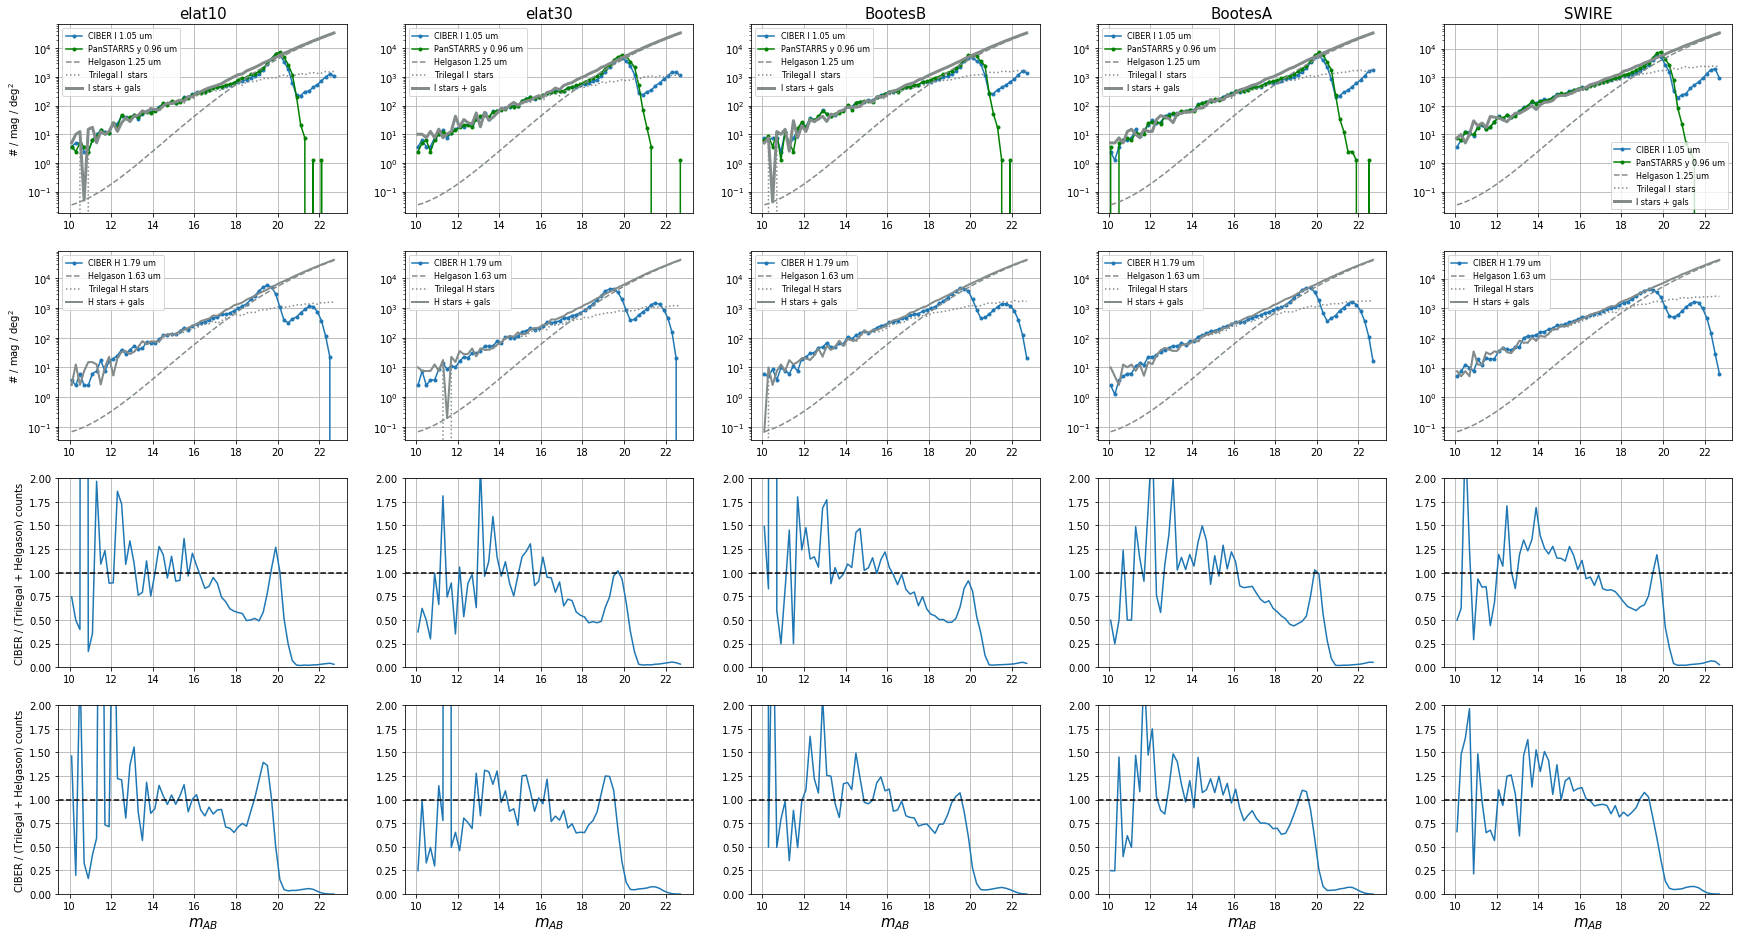

In [118]:
fig, ax = plt.subplots(4,5,figsize=(30,16))

for i,field in enumerate(['elat10', 'elat30', 'BootesB', 'BootesA', 'SWIRE']):

    inst = 1
    catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
    fname=catcoorddir+'PanSTARRS/'+ field + '.txt'
    dfI = pd.read_csv(fname)

    inst = 2
    catcoorddir='../../doc/20170617_Stacking/maps/catcoord/TM'+str(inst)+'/'
    fname=catcoorddir+'PanSTARRS/'+ field + '.txt'
    dfH = pd.read_csv(fname)
    
    dfI['I'] = get_corr_mag(1, dfI['y'], dfI['dbscanClass'], dfI['I_lin'])
    dfH['H'] = get_corr_mag(2, dfH['y'], dfH['dbscanClass'], dfH['H_lin'])
    dfI.drop(dfI[(dfI.x < -0.5) | (dfI.x > 1023.5) | (dfI.y < -0.5) | (dfI.y > 1023.5)].index, inplace = True)
    dfH.drop(dfH[(dfH.x < -0.5) | (dfH.x > 1023.5) | (dfH.y < -0.5) | (dfH.y > 1023.5)].index, inplace = True)
    

    dm = 0.2
    magedge_arr = np.arange(10,23,dm)
    mag_arr = (magedge_arr[1:] + magedge_arr[:-1]) / 2
    histI_arr = np.histogram(dfI['I'].values, magedge_arr)[0] / 4 / dm
    ax[0][i].plot(mag_arr,histI_arr, '.-', label = 'CIBER I 1.05 um')
    histH_arr = np.histogram(dfH['H'].values, magedge_arr)[0] / 4 / dm
    ax[1][i].plot(mag_arr,histH_arr, '.-', label = 'CIBER H 1.79 um')

    histy_arr = np.histogram(dfI['yMeanPSFMag'].values, magedge_arr)[0] / 4 / dm
    ax[0][i].plot(mag_arr,histy_arr, 'g.-', label = 'PanSTARRS y 0.96 um')

    helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
    helgdat = np.loadtxt(helgdir + 'Helgason125.txt', skiprows=1, delimiter=',')
    helgI = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mag_arr))
    ax[0][i].plot(mag_arr, helgI, '--', c = '#838B8B', label = 'Helgason 1.25 um')
    helgdat = np.loadtxt(helgdir + 'Helgason163.txt', skiprows=1, delimiter=',')
    helgH = np.exp(np.polyval(np.polyfit(helgdat[:,0], np.log(helgdat[:,1]), 5), mag_arr))
    ax[1][i].plot(mag_arr, helgH, '--', c = '#838B8B', label = 'Helgason 1.63 um')

    fname = '/Users/ytcheng/ciber/doc/20170617_Stacking/maps/trilegal/'
    dfs = pd.read_csv(fname + field +'.dat', delim_whitespace=True, usecols=["I","H"])
    dfs.dropna(axis = 0, how = 'any', inplace=True)
    triI = np.histogram(dfs['I'].values, magedge_arr)[0] / 2 / dm
    ax[0][i].plot(mag_arr,triI, ':', c = '#838B8B', label = 'Trilegal I  stars')
    triH = np.histogram(dfs['H'].values, magedge_arr)[0] / 2 / dm
    ax[1][i].plot(mag_arr,triH, ':', c = '#838B8B', label = 'Trilegal H stars')

    ax[0][i].plot(mag_arr,triI + helgI, '-', lw = 3, c = '#838B8B', label = 'I stars + gals')
    ax[1][i].plot(mag_arr,triH + helgH, '-', lw = 2, c = '#838B8B', label = 'H stars + gals')

    ax[2][i].plot(mag_arr, histI_arr / (triI + helgI))
    ax[2][i].axhline(1, c = 'k', ls = '--')
    ax[3][i].plot(mag_arr, histH_arr / (triH + helgH))
    ax[3][i].axhline(1, c = 'k', ls = '--')

    ax[0][i].set_title(field, fontsize = 15)
    ax[3][i].set_xlabel(r'$m_{AB}$', fontsize = 15)
    ax[0][i].set_yscale('log')
    ax[1][i].set_yscale('log')
    ax[2][i].set_ylim([0,2])
    ax[3][i].set_ylim([0,2])
    ax[0][i].legend(loc=0, fontsize = 8)
    ax[1][i].legend(loc=0, fontsize = 8)
    ax[0][i].grid()
    ax[1][i].grid()
    ax[2][i].grid()
    ax[3][i].grid()
ax[0][0].set_ylabel(r'# / mag / deg$^2$', fontsize = 10)
ax[1][0].set_ylabel(r'# / mag / deg$^2$', fontsize = 10)
ax[2][0].set_ylabel('CIBER / (Trilegal + Helgason) counts', fontsize = 10)
ax[3][0].set_ylabel('CIBER / (Trilegal + Helgason) counts', fontsize = 10)

plt.savefig('PS_completeness.png', dpi = 200)